In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# kinetic parameters with assumed units:
aM = 15.1745   # 1/hr, transcription rate per nM of free DNA: DA--> DA+M
aP = 1         # 1/hr, translation rate per nM of mRNA: M-->M+P
aF = 1         # 1/hr, conversion rate from protein to repressor: P-->P+F
bM = 1         # 1/hr, mRNA degradation rate: M--> ∅
bP = 1         # 1/hr, protein degradation rate : P--> ∅
bF = 1         # 1/hr, repressor degradation rate: F--> ∅
kf = 200       # 1/(nM·hr), binding rate constant for free DNA and repressor: DA+F--> DR
kb = 50        # 1/hr, unbinding rate constant for the DNA-repressor complex: DR--> DA+F
DT = 165    # nM, total DNA concentration



def propensity_functions(y, volume):
    """
    y = [DA, M, P, F, DR]
    Returns [rho1, rho2, ..., rho9] in the order of R1..R9 from Problem 1.
    """
    DA, M, P, F, DR = y
    #0, 1, 2, 3, 4

    # R1: DA -> DA + M
    rho1 = aM * DA
    # R2:  M -> ∅
    rho2 = bM * M
    # R3:  M -> M + P
    rho3 = aP * M
    # R4:  P -> ∅
    rho4 = bP * P
    # R5:  P -> P + F
    rho5 = aF * P
    # R6:  F -> ∅
    rho6 = bF * F
    # R7:  DA + F -> DR
    rho7 = kf * DA * F / volume
    # R8:  DR -> DA + F
    rho8 = kb * DR
    # R9:  DR -> DA   (repressor dissociation/degradation)
    rho9 = bF * DR

    return [rho1, rho2, rho3, rho4, rho5, rho6, rho7, rho8, rho9]






    #  DA, M, P, F, DR = y
#       0,  1, 2, 3,  4

y=[165,0,0,0,0]
t_max=40
t=0
# Lists to store values
time=[t]
da_list=[y[0]]
m_list=[y[1]]
p_list=[y[2]]
f_list=[y[3]]
dr_list=[y[4]]

np.random.seed(42)



while t<t_max:
  props=propensity_functions(y,1)
  a0=sum(props) # total rate at which fastest reaction occurs
  if a0==0:
    break
  # time step ( to be sampled from exponential of rate a0)
  r1= np.random.rand() # r~U(0,1)
  tau= -np.log(r1)/a0 # exponential from uniform distribution
  t+=tau # updating time step

  # determine which reactions occur during Gillespie algorithm
  r2= np.random.rand()*a0 # r2~U(0,a0)
  cum=np.cumsum(props)

  if r2<cum[0]:
    # DA--> DA+M
    y[1]+=1
  elif r2<cum[1]:
    #M-->ø
    y[1]-=1
  elif r2<cum[2]:
    # M-->M+P
    y[2]+=1
  elif r2<cum[3]:
    # P--> ø
    y[2]-=1
  elif r2<cum[4]:
    #p-->P+F
    y[3]+=1
  elif r2<cum[5]:
    # F-->ø
    y[3]-=1
  elif r2<cum[6]:
    # DA+F --> DR
    y[0]-=1
    y[3]-=1
    y[4]+=1
  elif r2<cum[7]:
    # DR --> DA+F
    y[0]+=1
    y[3]+=1
    y[4]-=1
  else:
    # DR--> DA
    y[0]+=1
    y[4]-=1

  # Record states
  time.append(t)
  da_list.append(y[0])
  m_list.append(y[1])
  p_list.append(y[2])
  f_list.append(y[3])
  dr_list.append(y[4])




plt.figure(figsize=(10,6))
plt.step(time, m_list,     where='post', label='$n_M$',           color='C0')
plt.step(time, np.array(da_list)/DT, where='post', label='$n_{D_A}/n_{D_T}$', color='C1')
plt.xlabel('Time (hr)')
plt.ylabel('Molecule count / DNA fraction')
plt.title('Gillespie Simulation of Negative Autoregulation\n(Problem 2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()






In [2]:
def propensity_functions(y, volume):
    """
    y = [DA, M, P, F, DR]
    Returns [rho1, rho2, ..., rho9] in the order of R1..R9 from Problem 1.
    """
    DA, M, P, F, DR = y
    #0, 1, 2, 3, 4

    # R1: DA -> DA + M
    rho1 = aM * DA
    # R2:  M -> ∅
    rho2 = bM * M
    # R3:  M -> M + P
    rho3 = aP * M
    # R4:  P -> ∅
    rho4 = bP * P
    # R5:  P -> P + F
    rho5 = aF * P
    # R6:  F -> ∅
    rho6 = bF * F
    # R7:  DA + F -> DR
    rho7 = kf * DA * F / volume
    # R8:  DR -> DA + F
    rho8 = kb * DR
    # R9:  DR -> DA   (repressor dissociation/degradation)
    rho9 = bF * DR

    return [rho1, rho2, rho3, rho4, rho5, rho6, rho7, rho8, rho9]






    #  DA, M, P, F, DR = y
#       0,  1, 2, 3,  4

y=[165,0,0,0,0]
t_max=40
t=0
# Lists to store values
time=[t]
da_list=[y[0]]
m_list=[y[1]]
p_list=[y[2]]
f_list=[y[3]]
dr_list=[y[4]]

np.random.seed(42)



while t<t_max:
  props=propensity_functions(y,1)
  a0=sum(props) # total rate at which fastest reaction occurs
  if a0==0:
    break
  # time step ( to be sampled from exponential of rate a0)
  r1= np.random.rand() # r~U(0,1)
  tau= -np.log(r1)/a0 # exponential from uniform distribution
  t+=tau # updating time step

  # determine which reactions occur during Gillespie algorithm
  r2= np.random.rand()*a0 # r2~U(0,a0)
  cum=np.cumsum(props)

  if r2<cum[0]:
    # DA--> DA+M
    y[1]+=1
  elif r2<cum[1]:
    #M-->ø
    y[1]-=1
  elif r2<cum[2]:
    # M-->M+P
    y[2]+=1
  elif r2<cum[3]:
    # P--> ø
    y[2]-=1
  elif r2<cum[4]:
    #p-->P+F
    y[3]+=1
  elif r2<cum[5]:
    # F-->ø
    y[3]-=1
  elif r2<cum[6]:
    # DA+F --> DR
    y[0]-=1
    y[3]-=1
    y[4]+=1
  elif r2<cum[7]:
    # DR --> DA+F
    y[0]+=1
    y[3]+=1
    y[4]-=1
  else:
    # DR--> DA
    y[0]+=1
    y[4]-=1

  # Record states
  time.append(t)
  da_list.append(y[0])
  m_list.append(y[1])
  p_list.append(y[2])
  f_list.append(y[3])
  dr_list.append(y[4])







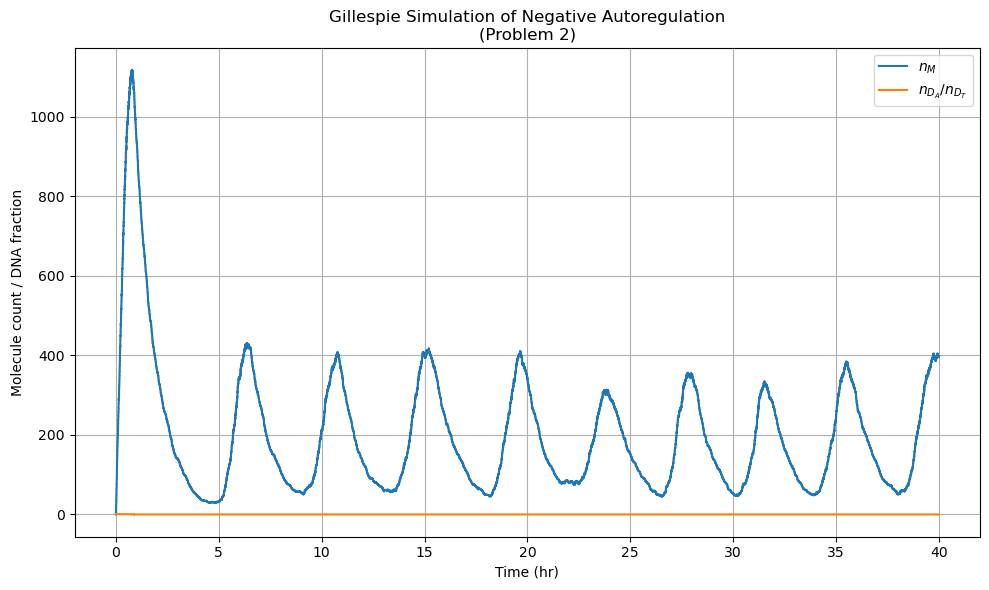

In [3]:


plt.figure(figsize=(10,6))
plt.step(time, m_list,     where='post', label='$n_M$',           color='C0')
plt.step(time, np.array(da_list)/DT, where='post', label='$n_{D_A}/n_{D_T}$', color='C1')
plt.xlabel('Time (hr)')
plt.ylabel('Molecule count / DNA fraction')
plt.title('Gillespie Simulation of Negative Autoregulation\n(Problem 2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Problem 2: zoomed-in versio of the yellow curve: average promoter occupancy

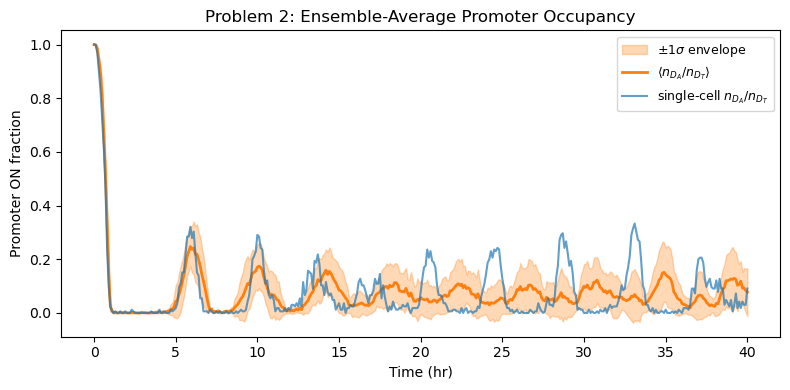

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#─── 1) parameters ─────────────────────────────────────────────────────────────
aM, aP, aF = 15.1745, 1.0, 1.0   # α_M, α_P, α_F
bM, bP, bF = 1.0, 1.0, 1.0       # β_M, β_P, β_F
kf, kb      = 200.0, 50.0        # k_f, k_b
DT          = 165                # total DNA count
np.random.seed(12345)

#─── 2) propensity function ────────────────────────────────────────────────────
def propensity(y, Ω=1.0):
    DA, M, P, F, DR = y
    return np.array([
        aM * DA,                # R1: DA → DA + M
        bM * M,                 # R2: M → ∅
        aP * M,                 # R3: M → M + P
        bP * P,                 # R4: P → ∅
        aF * P,                 # R5: P → P + F
        bF * F,                 # R6: F → ∅
        kf * DA * F / Ω,        # R7: DA + F → DR
        kb * DR,                # R8: DR → DA + F
        bF * DR                 # R9: DR → DA    (repressor loss)
    ])

#─── 3) single‐trajectory simulator that bins onto a uniform grid ──────────────
def simulate_fraction(active_grid, t_max=40.0, Ω=1.0):
    """
    Simulate one Gillespie trajectory, returning
      frac_DA = array of DA/DT sampled at the times in active_grid.
    """
    DA = DT
    state = np.array([DA, 0, 0, 0, 0], dtype=int)
    t = 0.0
    frac = np.empty_like(active_grid)
    idx = 0

    # fill in initial
    frac[idx] = state[0] / DT
    idx += 1

    while t < active_grid[-1]:
        props = propensity(state, Ω)
        a0    = props.sum()
        if a0 <= 0:
            # no more reactions
            frac[idx:] = state[0] / DT
            break

        # draw time to next reaction
        r1 = np.random.rand()
        τ  = -np.log(r1) / a0
        t_next = t + τ

        # fill in all grid points up to t_next with current DA/DT
        while idx < len(active_grid) and active_grid[idx] <= t_next:
            frac[idx] = state[0] / DT
            idx += 1
        t = t_next

        # choose which reaction fires
        r2 = np.random.rand() * a0
        cum = np.cumsum(props)
        j   = np.searchsorted(cum, r2, side='right')

        # apply stoichiometry
        if   j == 0: state[1] += 1           # R1
        elif j == 1: state[1] -= 1           # R2
        elif j == 2: state[2] += 1           # R3
        elif j == 3: state[2] -= 1           # R4
        elif j == 4: state[3] += 1           # R5
        elif j == 5: state[3] -= 1           # R6
        elif j == 6:                         # R7: DA+F→DR
            state[0] -= 1; state[3] -= 1; state[4] += 1
        elif j == 7:                         # R8: DR→DA+F
            state[0] += 1; state[3] += 1; state[4] -= 1
        else:                                # R9: DR→DA
            state[0] += 1; state[4] -= 1

    # if we exited early, fill the rest
    while idx < len(active_grid):
        frac[idx] = state[0] / DT
        idx += 1

    return frac

#─── 4) build ensemble ─────────────────────────────────────────────────────────
t_max    = 40.0
dt       = 0.1
times    = np.arange(0, t_max+dt/2, dt)
Ntrials  = 10

all_frac = np.zeros((Ntrials, len(times)))
for k in range(Ntrials):
    all_frac[k] = simulate_fraction(times, t_max)

mean_frac = all_frac.mean(axis=0)
std_frac  = all_frac.std(axis=0)

# also grab one single‐cell trace for illustration
single_frac = all_frac[0]

#─── 5) plot ───────────────────────────────────────────────────────────────────
plt.figure(figsize=(8,4))

# ±1σ envelope
plt.fill_between(times,
                 mean_frac-std_frac,
                 mean_frac+std_frac,
                 color='C1', alpha=0.3,
                 label=r'$\pm1\sigma$ envelope')

# mean trace
plt.plot(times, mean_frac, color='C1',
         lw=2, label=r'$\langle n_{D_A}/n_{D_T}\rangle$')

# one single‐cell
plt.plot(times, single_frac, color='C0', alpha=0.7,
         label='single‐cell $n_{D_A}/n_{D_T}$')

plt.xlabel('Time (hr)')
plt.ylabel('Promoter ON fraction')
plt.title('Problem 2: Ensemble‐Average Promoter Occupancy')
plt.legend(loc='upper right', fontsize=9)
plt.tight_layout()
plt.show()
